In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tslearn.clustering import KShape
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.utils import to_time_series_dataset

from sklearn.metrics import adjusted_rand_score



### Read data

In [2]:
df = pd.read_csv("all_coins_data.csv")
df.sort_values(["coin", "time"], inplace = True)
df = df[["time","daily_log_return", "coin"]]

In [3]:
df=df.pivot(index="coin", columns="time",values="daily_log_return")

### Generate Dataset

In [4]:
dfts = to_time_series_dataset(df)

In [5]:
print("Number of time series: ", len(dfts))
print("Number of unique classes:", len(np.unique(dfts[:,0])))
print("Time series length:", len(dfts[0,1:]))


Number of time series:  45
Number of unique classes: 44
Time series length: 245


In [6]:
X_train = TimeSeriesScalerMeanVariance().fit_transform(dfts)

### Clustering

In [7]:
n_clusters = range(3,11)

In [8]:
# Training using kShape

for i in n_clusters:
    ks = KShape(n_clusters=i, max_iter=100, n_init=100,verbose=0)
    y_pred = ks.fit_predict(X_train)

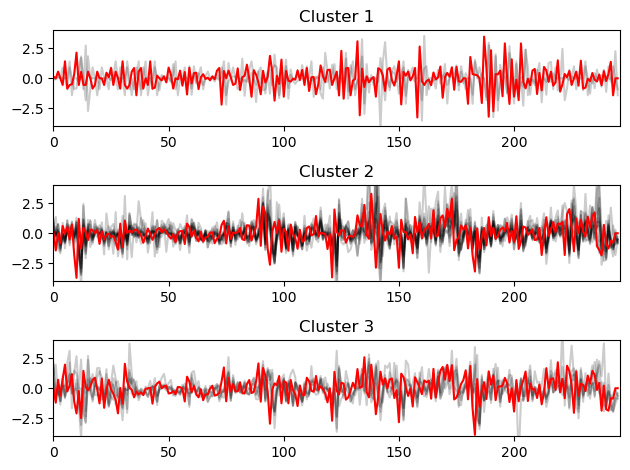

In [9]:
plt.figure()

sz = X_train.shape[1]

for yi in range(3):
    plt.subplot(3, 1, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.title("Cluster %d" % (yi + 1))

plt.tight_layout()
plt.show()
